# Lecture 2: Multi-Qubit Gates and Entanglement

In Lecture 1, we explored individual qubits. Now, we'll see how multiple qubits can interact. This is where quantum computing truly starts to show its power, especially through the phenomenon of **entanglement**.

We'll cover:
1.  Representing multi-qubit states (tensor products).
2.  The CNOT (Controlled-NOT) gate: a fundamental two-qubit gate.
3.  Creating entangled Bell states.
4.  Other important multi-qubit gates: CZ, SWAP.
5.  Building and simulating multi-qubit circuits.
6.  Measuring multi-qubit systems.

**Prerequisites:**
*   Completion of Lecture 1.
*   Understanding of single-qubit states and gates.

In [4]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city, circuit_drawer

# Qiskit Aer for simulation
from qiskit_aer import AerSimulator

# For potential connection to IBM Quantum (optional part of the lecture)
# from qiskit_ibm_provider import IBMProvider

# Standard Python libraries
import numpy as np
import matplotlib.pyplot as plt

print("Qiskit and other libraries imported successfully!")
print(f"Qiskit version: {qiskit.__version__}")

Qiskit and other libraries imported successfully!
Qiskit version: 2.0.1


## 1. Representing Multi-Qubit States: The Tensor Product

When we combine multiple qubits, their joint state space grows exponentially.
*   1 qubit: 2 basis states (|0⟩, |1⟩) -> State vector of size 2.
*   2 qubits: 2² = 4 basis states (|00⟩, |01⟩, |10⟩, |11⟩) -> State vector of size 4.
*   3 qubits: 2³ = 8 basis states (|000⟩, ..., |111⟩) -> State vector of size 8.
*   N qubits: 2^N basis states -> State vector of size 2^N.

**Qiskit Convention for Qubit Ordering:**
Qiskit orders qubits from right to left in its string representation of basis states, similar to classical binary numbers.
For two qubits, say q0 and q1, the state `|q1q0⟩` means:
*   `|00⟩` (q1=0, q0=0)
*   `|01⟩` (q1=0, q0=1)
*   `|10⟩` (q1=1, q0=0)
*   `|11⟩` (q1=1, q0=1)
The `Statevector` object in Qiskit maps these bitstrings to indices in ascending order of the integer value of the bitstring (qN...q1q0).
So, for 2 qubits (q1, q0):
*   Index 0: corresponds to bitstring `00` -> |00⟩
*   Index 1: corresponds to bitstring `01` -> |01⟩
*   Index 2: corresponds to bitstring `10` -> |10⟩
*   Index 3: corresponds to bitstring `11` -> |11⟩

**Math Section: The Tensor Product (Kronecker Product ⊗)**
We use the **tensor product** (denoted by ⊗) to mathematically combine the state spaces of individual qubits.
If qubit A is in state $|ψ_A⟩ = \begin{pmatrix} \alpha_0 \\ \alpha_1 \end{pmatrix}$ and qubit B is in state $|ψ_B⟩ = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}$,
their combined (unentangled) state $|ψ_{AB}⟩ = |ψ_A⟩ \otimes |ψ_B⟩$ is:
$$ |ψ_{AB}⟩ = \begin{pmatrix} \alpha_0 \\ \alpha_1 \end{pmatrix} \otimes \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix} = \begin{pmatrix} \alpha_0 \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix} \\ \alpha_1 \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} \alpha_0 \beta_0 \\ \alpha_0 \beta_1 \\ \alpha_1 \beta_0 \\ \alpha_1 \beta_1 \end{pmatrix} $$
The components of this resulting 4x1 vector correspond to the amplitudes of |00⟩, |01⟩, |10⟩, and |11⟩ respectively, assuming the standard Qiskit ordering (qubit 1, qubit 0).
Let's be more precise with Qiskit ordering:
If $|ψ_A⟩$ is the state of q1 and $|ψ_B⟩$ is the state of q0, then their combined state $|q1q0⟩ = |ψ_A⟩ \otimes |ψ_B⟩$.
*   Amplitude for |00⟩ (q1=0, q0=0): $\alpha_0 \beta_0$
*   Amplitude for |01⟩ (q1=0, q0=1): $\alpha_0 \beta_1$
*   Amplitude for |10⟩ (q1=1, q0=0): $\alpha_1 \beta_0$
*   Amplitude for |11⟩ (q1=1, q0=1): $\alpha_1 \beta_1$

A general 2-qubit state is:
$$ |ψ⟩ = c_{00}|00⟩ + c_{01}|01⟩ + c_{10}|10⟩ + c_{11}|11⟩ = \begin{pmatrix} c_{00} \\ c_{01} \\ c_{10} \\ c_{11} \end{pmatrix} $$
Where the sum of squared magnitudes of amplitudes is 1: $|c_{00}|^2 + |c_{01}|^2 + |c_{10}|^2 + |c_{11}|^2 = 1$.
Not all multi-qubit states can be written as a simple tensor product of individual qubit states. Those that cannot are called **entangled states**.

Statevector for |00>:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


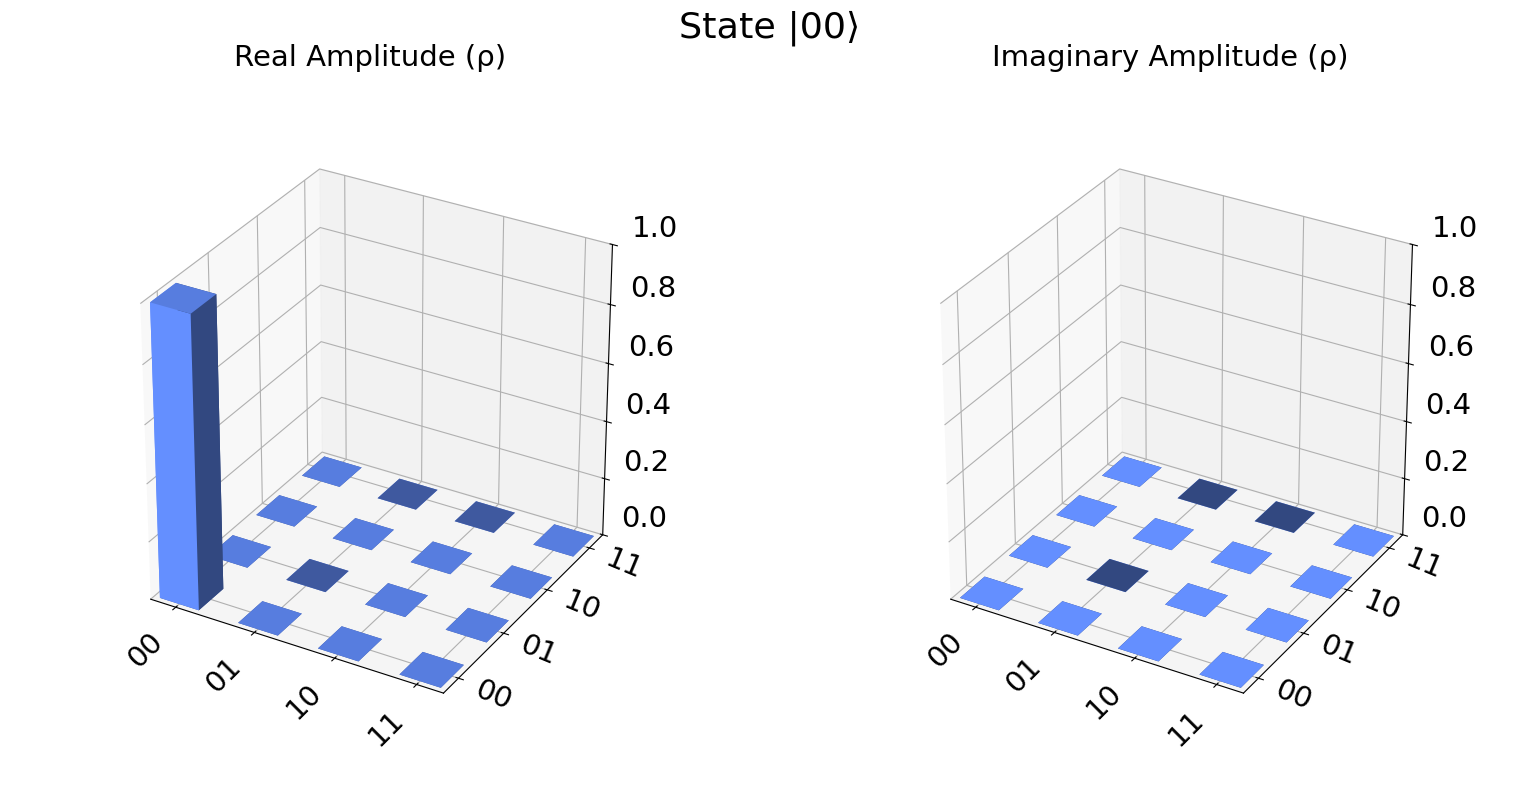

In [5]:
# Initial state |00> for a 2-qubit system
qc_2q_initial = QuantumCircuit(2) # Creates 2 qubits, both initialized to |0>
sv_initial = Statevector(qc_2q_initial)
print("Statevector for |00>:")
print(sv_initial.data) # Expect [1, 0, 0, 0]
plot_state_city(sv_initial, title="State |00⟩")

In [6]:
# Initial state |00> for a 2-qubit system
# Qubits in Qiskit circuits are indexed 0, 1, 2, ...
# So, QuantumCircuit(2) creates qubits q0 and q1.
# By default, they are both in |0>. The system is in |0>_q1 |0>_q0 = |00>.
qc_2q_initial = QuantumCircuit(2)
sv_initial = Statevector(qc_2q_initial)

print(f"Statevector for |00⟩ (q1=0, q0=0): {sv_initial.data}")
# Expected: [1, 0, 0, 0] (amplitude 1 for |00>, 0 for others)
plot_state_city(sv_initial, title="State |00⟩ (q1q0)")
plt.show()

# Let's prepare state |10> (q1=1, q0=0)
# We apply X to q1 (the higher index qubit in Qiskit's ordering convention for statevectors)
qc_10 = QuantumCircuit(2)
qc_10.x(1) # Apply X to qubit 1 (q1). q0 remains |0>.
sv_10 = Statevector(qc_10)
print(f"\nStatevector for |10⟩ (q1=1, q0=0): {np.round(sv_10.data,3)}")
# Expected: [0, 0, 1, 0] (amplitude 1 for |10>, 0 for others)
plot_state_city(sv_10, title="State |10⟩ (q1q0)")
plt.show()
# Circuit diagram:
print(qc_10.draw(output='text'))

Statevector for |00⟩ (q1=0, q0=0): [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

Statevector for |10⟩ (q1=1, q0=0): [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘


**Analysis:**
The statevector `[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]` confirms the system is in the state |00⟩ (amplitude 1 for the first basis state, 0 for others). `plot_state_city` is a way to visualize the amplitudes (real and imaginary parts) of a multi-qubit statevector.

## 2. The CNOT (Controlled-NOT) Gate

The CNOT gate is a fundamental **two-qubit gate**. It has:
*   One **control** qubit.
*   One **target** qubit.

**Action:**
*   If the control qubit is |0⟩, the target qubit is unchanged.
*   If the control qubit is |1⟩, the target qubit is flipped (like an X-gate).

**Truth Table (Input: Control Target -> Output: Control Target):**
*   |00⟩ -> |00⟩
*   |01⟩ -> |01⟩
*   |10⟩ -> |11⟩ (Target |0⟩ flips to |1⟩ because control is |1⟩)
*   |11⟩ -> |10⟩ (Target |1⟩ flips to |0⟩ because control is |1⟩)

**Math Section:**
The CNOT gate is represented by a 4x4 unitary matrix. If q0 is control and q1 is target (CNOT(0,1)):
$$ \text{CNOT} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix} $$
This matrix acts on the 4D statevector `(c_00, c_01, c_10, c_11)^T`.
The ordering of rows/columns corresponds to |00⟩, |01⟩, |10⟩, |11⟩.
*   CNOT |10⟩ = CNOT (0,0,1,0)^T = (0,0,0,1)^T = |11⟩.

**Physical Intuition:**
The CNOT gate allows qubits to influence each other. This conditional logic is essential for building complex quantum algorithms. It's a key ingredient for creating entanglement. Imagine two physical qubits (e.g., two ions in a trap). A laser pulse might be applied to the target ion *only if* the control ion is in a specific state (e.g., detected by its fluorescence or lack thereof affecting the laser's properties for the target).

In [4]:
# CNOT example: control qubit 0, target qubit 1
# qc.cx(control_qubit_index, target_qubit_index)

# Case 1: Input |00>
qc_cnot_00 = QuantumCircuit(2)
# No change needed, qubits are |00> by default
qc_cnot_00.cx(0, 1) # Control q0, Target q1
print("Circuit for CNOT on |00>:")
print(qc_cnot_00.draw(output='text'))
sv_cnot_00 = Statevector(qc_cnot_00)
print(f"Statevector for CNOT|00>: {np.round(sv_cnot_00.data, 3)}") # Expect [1,0,0,0]

# Case 2: Input |01>
qc_cnot_01 = QuantumCircuit(2)
qc_cnot_01.x(1) # q1 is |1>, q0 is |0>. State is |01>
qc_cnot_01.cx(0, 1)
print("\nCircuit for CNOT on |01>:")
print(qc_cnot_01.draw(output='text'))
sv_cnot_01 = Statevector(qc_cnot_01)
print(f"Statevector for CNOT|01>: {np.round(sv_cnot_01.data, 3)}") # Expect [0,1,0,0]

# Case 3: Input |10>
qc_cnot_10 = QuantumCircuit(2)
qc_cnot_10.x(0) # q0 is |1>, q1 is |0>. State is |10>
qc_cnot_10.cx(0, 1)
print("\nCircuit for CNOT on |10>:")
print(qc_cnot_10.draw(output='text'))
sv_cnot_10 = Statevector(qc_cnot_10)
print(f"Statevector for CNOT|10>: {np.round(sv_cnot_10.data, 3)}") # Expect [0,0,0,1] (becomes |11>)

# Case 4: Input |11>
qc_cnot_11 = QuantumCircuit(2)
qc_cnot_11.x(0) # q0 is |1>
qc_cnot_11.x(1) # q1 is |1>. State is |11>
qc_cnot_11.cx(0, 1)
print("\nCircuit for CNOT on |11>:")
print(qc_cnot_11.draw(output='text'))
sv_cnot_11 = Statevector(qc_cnot_11)
print(f"Statevector for CNOT|11>: {np.round(sv_cnot_11.data, 3)}") # Expect [0,0,1,0]

Circuit for CNOT on |00>:
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Statevector for CNOT|00>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

Circuit for CNOT on |01>:
               
q_0: ───────■──
     ┌───┐┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
Statevector for CNOT|01>: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]

Circuit for CNOT on |10>:
     ┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Statevector for CNOT|10>: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]

Circuit for CNOT on |11>:
     ┌───┐     
q_0: ┤ X ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
Statevector for CNOT|11>: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


In [7]:
# CNOT example: q0 as control, q1 as target
# Qiskit: qc.cx(control_qubit_index, target_qubit_index)

# Case 1: Input |00> (q0=0, q1=0). CNOT(0,1)
qc_cnot_00 = QuantumCircuit(2)
# Qubits are |00> by default
qc_cnot_00.cx(0, 1) # Control q0, Target q1
print("Circuit for CNOT(q0,q1) on |00>:")
print(qc_cnot_00.draw(output='text'))
sv_cnot_00 = Statevector(qc_cnot_00)
print(f"Statevector CNOT(q0,q1)|00>: {np.round(sv_cnot_00.data, 3)}") # Expect [1,0,0,0] -> |00>

# Case 2: Input |10> (q0=1, q1=0). CNOT(0,1)
qc_cnot_10 = QuantumCircuit(2)
qc_cnot_10.x(0) # q0 is |1>, q1 is |0>. State is |01> in (q1 q0) order, index 1
                # Or, if thinking (control=q0, target=q1), this input is |target=0, control=1>
qc_cnot_10.cx(0, 1) # Control q0, Target q1
print("\nCircuit for CNOT(q0,q1) on |target=0, control=1> (input |01> for q1q0):")
print(qc_cnot_10.draw(output='text'))
sv_cnot_10 = Statevector(qc_cnot_10)
print(f"Statevector CNOT(q0,q1)|01> (input): {np.round(sv_cnot_10.data, 3)}") # Expect [0,0,0,1] -> |11>

# Let's clarify the input state for case 2:
# We want input |10> meaning control q0 is |1> and target q1 is |0>.
# In Qiskit's qubit indexing (q0, q1), this means X on q0.
# The statevector will represent |q1q0>. So if q0=1, q1=0, this is state |01> (index 1).
# After CNOT(0,1), q1 (target) flips. So q0=1, q1=1. This is state |11> (index 3).

print("\n--- Let's re-verify CNOT truth table with standard q1q0 statevector ordering ---")
# Input |00> (idx 0) -> CNOT(c=q0, t=q1) -> |00> (idx 0)
# Input |01> (idx 1, q0=1, q1=0) -> CNOT(c=q0, t=q1) -> q1 flips -> |11> (idx 3)
# Input |10> (idx 2, q0=0, q1=1) -> CNOT(c=q0, t=q1) -> q1 no change -> |10> (idx 2)
# Input |11> (idx 3, q0=1, q1=1) -> CNOT(c=q0, t=q1) -> q1 flips -> |01> (idx 1)

# Test CNOT(control=q1, target=q0)
# Case 3: Input |10> (q1=1, q0=0). CNOT(1,0)
qc_cnot_c1t0 = QuantumCircuit(2)
qc_cnot_c1t0.x(1) # q1=|1>, q0=|0>. State is |10> (index 2)
qc_cnot_c1t0.cx(1, 0) # Control q1, Target q0
print("\nCircuit for CNOT(q1,q0) on |10> (input):")
print(qc_cnot_c1t0.draw(output='text'))
sv_cnot_c1t0 = Statevector(qc_cnot_c1t0)
# Expect target q0 to flip. State becomes |11> (index 3).
print(f"Statevector CNOT(q1,q0)|10>: {np.round(sv_cnot_c1t0.data, 3)}")

Circuit for CNOT(q0,q1) on |00>:
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Statevector CNOT(q0,q1)|00>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

Circuit for CNOT(q0,q1) on |target=0, control=1> (input |01> for q1q0):
     ┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Statevector CNOT(q0,q1)|01> (input): [0.+0.j 0.+0.j 0.+0.j 1.+0.j]

--- Let's re-verify CNOT truth table with standard q1q0 statevector ordering ---

Circuit for CNOT(q1,q0) on |10> (input):
          ┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘     
Statevector CNOT(q1,q0)|10>: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


**Analysis:**
The Qiskit code `qc.cx(control, target)` implements the CNOT gate. The outputs match the truth table:
*   CNOT on |00⟩ (statevector index 0) gives |00⟩.
*   CNOT on |01⟩ (statevector index 1) gives |01⟩.
*   CNOT on |10⟩ (statevector index 2) gives |11⟩ (statevector index 3).
*   CNOT on |11⟩ (statevector index 3) gives |10⟩ (statevector index 2).

**Analysis:**
The Qiskit command `qc.cx(control_qubit_index, target_qubit_index)` implements the CNOT.
It's vital to keep track of which qubit is control and which is target, and how this maps to the statevector components.
*   `CNOT(q0,q1)` on initial `|00>` (q1=0, q0=0): Control q0 is 0, so q1 is unchanged. Output `|00>`. Statevector `[1,0,0,0]`.
*   `CNOT(q0,q1)` on initial `|01>` (q1=0, q0=1 after `qc.x(0)`): Control q0 is 1, so q1 (initially 0) flips to 1. Output `|11>`. Statevector `[0,0,0,1]`.
*   `CNOT(q1,q0)` on initial `|10>` (q1=1, q0=0 after `qc.x(1)`): Control q1 is 1, so q0 (initially 0) flips to 1. Output `|11>`. Statevector `[0,0,0,1]`.

The CNOT gate does not change the control qubit's state in the computational basis; it only potentially changes the target.

## 3. Entanglement: "Spooky Action at a Distance"

Entanglement is one of the most counter-intuitive yet powerful features of quantum mechanics. Two (or more) qubits are **entangled** if their quantum states are linked in such a way that they must be described in reference to each other, even if they are physically separated by vast distances.
An entangled state **cannot** be written as a simple tensor product of individual, independent qubit states (e.g., it's not just $|ψ_A⟩ \otimes |ψ_B⟩$).

**The Bell States (or EPR Pairs)** are the four maximally entangled two-qubit states. They form a basis for all two-qubit states.
1.  $|Φ^+⟩ = \frac{|00⟩ + |11⟩}{\sqrt{2}}$  (Phi plus)
2.  $|Φ^-⟩ = \frac{|00⟩ - |11⟩}{\sqrt{2}}$  (Phi minus)
3.  $|Ψ^+⟩ = \frac{|01⟩ + |10⟩}{\sqrt{2}}$  (Psi plus)
4.  $|Ψ^-⟩ = \frac{|01⟩ - |10⟩}{\sqrt{2}}$  (Psi minus)

Consider $|Φ^+⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)$.
*   The amplitudes are $c_{00} = 1/\sqrt{2}$, $c_{11} = 1/\sqrt{2}$, and $c_{01}=c_{10}=0$.
*   If you measure the first qubit (say, q0) and get |0⟩, you instantly know the second qubit (q1) is also |0⟩.
*   If you measure the first qubit and get |1⟩, you instantly know the second qubit is also |1⟩.
Their measurement outcomes are perfectly correlated, even though *before* measurement, neither qubit is definitively |0⟩ or |1⟩. This correlation holds no matter how far apart the qubits are.

**Creating the Bell State $|Φ^+⟩$ (q0, q1):**
This is a standard recipe:
1.  Start with two qubits in the state |00⟩ (e.g., q0=|0⟩, q1=|0⟩).
2.  Apply a Hadamard gate (H) to the first qubit (q0).
    The state becomes: $(H|0⟩_0) \otimes |0⟩_1 = \left(\frac{|0⟩_0 + |1⟩_0}{\sqrt{2}}\right) \otimes |0⟩_1 = \frac{|00⟩ + |10⟩}{\sqrt{2}}$.
    (Using Qiskit q0, q1 this is state $\frac{1}{\sqrt{2}}(|0_10_0\rangle + |0_11_0\rangle)$ )
3.  Apply a CNOT gate with q0 as control and q1 as target.
    CNOT(q0,q1) acts on $\frac{|00⟩ + |10⟩}{\sqrt{2}}$:
    *   For the $|00⟩$ part (control q0 is 0): q1 is unchanged. Contribution: $\frac{|00⟩}{\sqrt{2}}$.
    *   For the $|10⟩$ part (control q0 is 1): q1 flips from 0 to 1. Contribution: $\frac{|11⟩}{\sqrt{2}}$.
    The final state is $\frac{|00⟩ + |11⟩}{\sqrt{2}} = |Φ^+⟩$.
    (In Qiskit order q1q0: H on q0, CNOT(q0,q1) state $\frac{1}{\sqrt{2}}(|0_10_0\rangle + |1_11_0\rangle)$ )

Circuit for Bell state |Φ+> preparation:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               

Statevector for |Φ+>: [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]

Circuit with measurement:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Measurement counts for |Φ+>: {'00': 499, '11': 525}


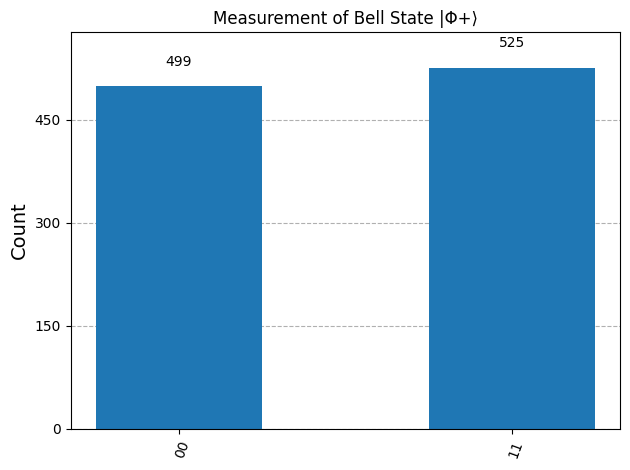

In [8]:
# Create the Bell state |Φ+>
qc_bell = QuantumCircuit(2, 2) # 2 qubits, 2 classical bits for measurement

# Step 1: Apply H to q0
qc_bell.h(0)

# Step 2: Apply CNOT with q0 as control, q1 as target
qc_bell.cx(0, 1)

print("Circuit for Bell state |Φ+> preparation:")
print(qc_bell.draw(output='text'))

# Let's look at the statevector
sv_bell = Statevector(qc_bell)
print(f"\nStatevector for |Φ+>: {np.round(sv_bell.data, 3)}")
# Expect [1/sqrt(2), 0, 0, 1/sqrt(2)] which is [0.707, 0, 0, 0.707]
plot_state_city(sv_bell, title="Bell State |Φ+⟩")

# Now, let's measure this state
qc_bell.measure([0,1], [0,1]) # Measure q0 to c0, q1 to c1

print("\nCircuit with measurement:")
print(qc_bell.draw(output='text'))

# Simulate
simulator = AerSimulator()
compiled_bell_circuit = transpile(qc_bell, simulator)
job_bell = simulator.run(compiled_bell_circuit, shots=1024)
result_bell = job_bell.result()
counts_bell = result_bell.get_counts(qc_bell)

print(f"\nMeasurement counts for |Φ+>: {counts_bell}")
plot_histogram(counts_bell, title="Measurement of Bell State |Φ+⟩")

In [9]:
# Create the Bell state |Φ+> = (|00> + |11>)/sqrt(2)
# We'll use q0 and q1.
qc_bell_phi_plus = QuantumCircuit(2, 2) # 2 qubits (q0, q1), 2 classical bits (c0, c1)

# Step 1: Apply H to q0
qc_bell_phi_plus.h(0)

# Step 2: Apply CNOT with q0 as control, q1 as target
qc_bell_phi_plus.cx(0, 1)

print("Circuit for Bell state |Φ+> preparation:")
print(qc_bell_phi_plus.draw(output='text'))

# Let's look at the statevector before measurement
sv_bell = Statevector(qc_bell_phi_plus) # Statevector from circuit without measurement part
print(f"\nStatevector for |Φ+>: {np.round(sv_bell.data, 3)}")
# Expected statevector based on q1q0 ordering:
# c00 for |00> (q1=0,q0=0) is 1/sqrt(2)
# c01 for |01> (q1=0,q0=1) is 0
# c10 for |10> (q1=1,q0=0) is 0
# c11 for |11> (q1=1,q0=1) is 1/sqrt(2)
# So, [0.707, 0, 0, 0.707]
plot_state_city(sv_bell, title="Bell State |Φ+⟩ (q1q0)")
plt.show()

# Now, let's add measurement to the circuit
# Measure q0 to classical bit c0, q1 to classical bit c1
qc_bell_phi_plus.measure([0,1], [0,1]) # or qc_bell_phi_plus.measure_all() if #clbits == #qubits

print("\nBell state circuit with measurement:")
print(qc_bell_phi_plus.draw(output='text'))

# Simulate
simulator = AerSimulator()
compiled_bell_circuit = transpile(qc_bell_phi_plus, simulator)
job_bell = simulator.run(compiled_bell_circuit, shots=2048)
result_bell = job_bell.result()
counts_bell = result_bell.get_counts(qc_bell_phi_plus)

print(f"\nMeasurement counts for |Φ+>: {counts_bell}")
# Qiskit measurement results are typically strings like '00', '11' (classical_bit_1 classical_bit_0)
plot_histogram(counts_bell, title="Measurement of Bell State |Φ+⟩")
plt.show()

Circuit for Bell state |Φ+> preparation:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               

Statevector for |Φ+>: [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]

Bell state circuit with measurement:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Measurement counts for |Φ+>: {'11': 1070, '00': 978}


**Analysis:**
The statevector `[0.707+0.j, 0.+0.j, 0.+0.j, 0.707+0.j]` represents `(1/√2)|00⟩ + (1/√2)|11⟩`.
When we measure, we get either '00' or '11', each with approximately 50% probability. We never get '01' or '10'. This perfect correlation between the measurement outcomes of q0 and q1 is a hallmark of entanglement.
If we measure q0 and find it to be '0', q1 *must* be '0'. If q0 is '1', q1 *must* be '1'.

**Physical Intuition for Entanglement:**
Entanglement means the qubits are no longer independent entities, even if physically separated. Their properties are linked. This isn't just classical correlation (like two coins that are both heads or both tails). In quantum entanglement, the specific outcomes (e.g., '0' or '1') are not determined until measurement, but the correlation *between* the outcomes is pre-defined by the entangled state. This non-local correlation is a key resource in quantum communication (like quantum teleportation) and quantum computing.

**Analysis:**
The statevector for $|Φ^+⟩$ is `[0.707+0.j, 0.+0.j, 0.+0.j, 0.707+0.j]`, representing $(1/√2)|00⟩ + (0)|01⟩ + (0)|10⟩ + (1/√2)|11⟩$. This correctly corresponds to the amplitudes of the $|Φ^+⟩$ state.
When we measure this state multiple times, the histogram of `counts_bell` shows that we only ever get the outcomes '00' or '11' (q1q0). We never observe '01' or '10'. The probabilities for '00' and '11' are each approximately 50%.
This perfect correlation is a key signature of entanglement. If qubit q0 is measured as 0, qubit q1 is *guaranteed* to be 0 for that shot, and vice-versa for 1.

**Physical Intuition for Entanglement:**
Entanglement is a non-local property. It means the two qubits are no longer independent entities; they form a single, unified quantum system. Their individual properties are not well-defined until a measurement is made on one of them, at which point the state of the other is instantly determined (or constrained), regardless of the physical distance separating them. This doesn't mean information is traveling faster than light; you still need classical communication to compare measurement results from two distant entangled qubits to *realize* the correlation. Entanglement is a fundamental resource for quantum computation (e.g., in Shor's algorithm, quantum error correction) and quantum communication (e.g., quantum teleportation, quantum key distribution).

## 4. Other Important Multi-Qubit Gates

### 4.1 CZ Gate (Controlled-Z)

The CZ gate applies a Z-gate to the target qubit if and only if the control qubit is in the state |1⟩.
*   CZ |00⟩ -> |00⟩
*   CZ |01⟩ -> |01⟩
*   CZ |10⟩ -> |10⟩ (If control is |0⟩, no phase flip)
*   CZ |11⟩ -> -|11⟩ (If control is |1⟩, target is also |1⟩, a Z gate on target flips phase of |1⟩ part)

The CZ gate is symmetric: applying CZ with q0 as control and q1 as target (`qc.cz(0,1)`) is the same as CZ with q1 as control and q0 as target (`qc.cz(1,0)`).

**Math Section (Matrix for CZ(q1_control, q0_target) on |q1q0⟩):**
$$ \text{CZ} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix} $$
This matrix flips the phase of the |11⟩ component of the statevector.
A CZ gate can be constructed from CNOT and H gates: `CZ(c,t) = H(t) CNOT(c,t) H(t)`.

Initial state for CZ test (|+ +>):
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]

Circuit for CZ on |+ +>:
     ┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘   

Statevector after CZ on |+ +>: [ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


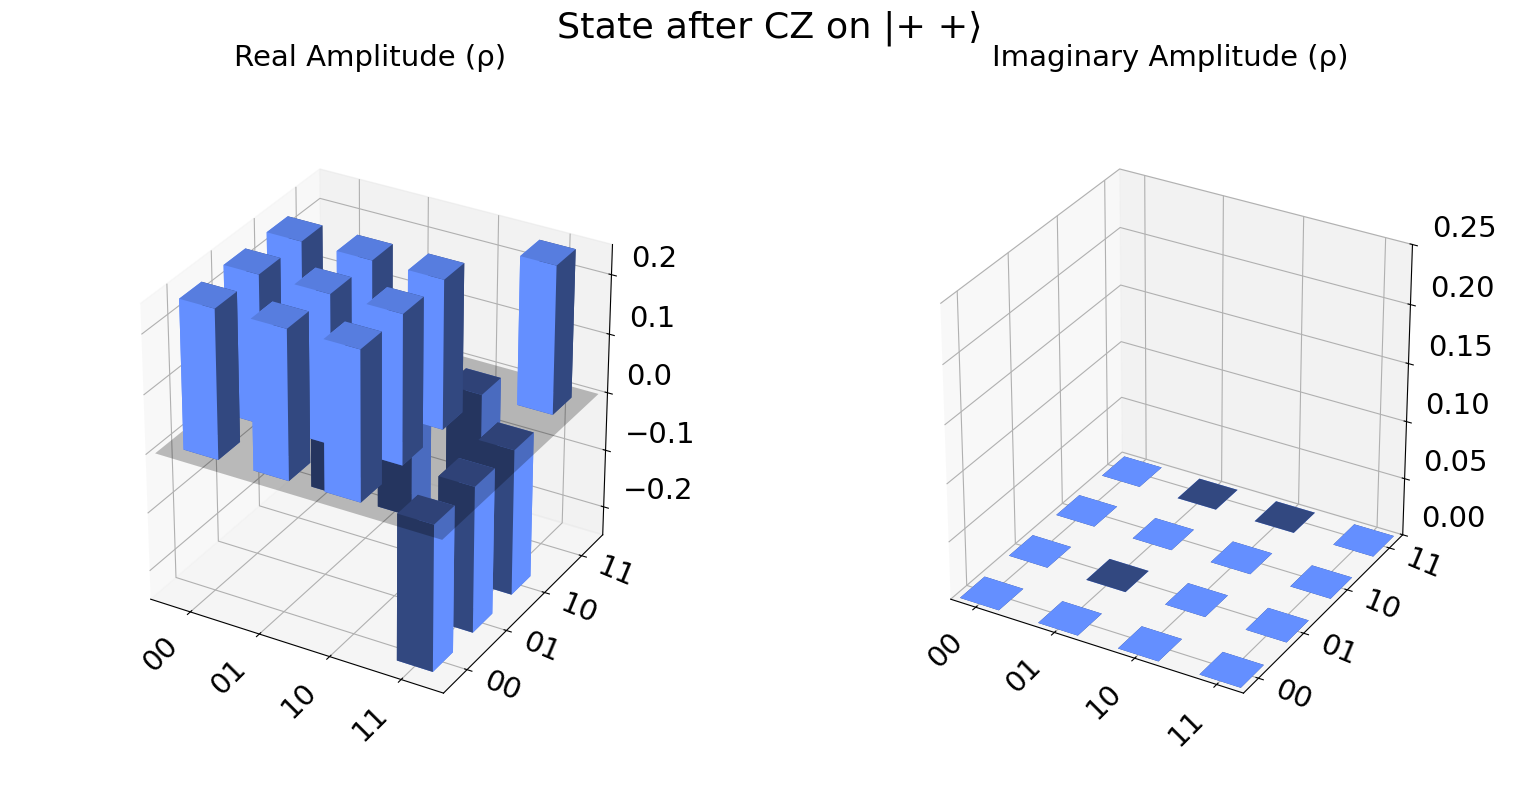

In [6]:
qc_cz = QuantumCircuit(2)
# Let's test CZ on |++> state: H(0)H(1)|00> = 1/2 (|00> + |01> + |10> + |11>)
qc_cz.h(0)
qc_cz.h(1)
print("Initial state for CZ test (|+ +>):")
sv_before_cz = Statevector(qc_cz)
print(np.round(sv_before_cz.data, 3)) # Should be [0.5, 0.5, 0.5, 0.5]

qc_cz.cz(0,1) # Apply CZ gate (control q0, target q1)
print("\nCircuit for CZ on |+ +>:")
print(qc_cz.draw(output='text'))

sv_after_cz = Statevector(qc_cz)
print(f"\nStatevector after CZ on |+ +>: {np.round(sv_after_cz.data, 3)}")
# Expect [0.5, 0.5, 0.5, -0.5]
plot_state_city(sv_after_cz, title="State after CZ on |+ +⟩")

In [10]:
qc_cz_test = QuantumCircuit(2)
# Let's test CZ on the state |++> = H(q0)H(q1)|00>
# |++> = 1/2 (|00> + |01> + |10> + |11>)
qc_cz_test.h(0)
qc_cz_test.h(1)
print("Initial state for CZ test (|+ +>):")
sv_before_cz = Statevector(qc_cz_test)
print(np.round(sv_before_cz.data, 3)) # Should be [0.5, 0.5, 0.5, 0.5]

# Apply CZ gate (e.g., control q0, target q1)
qc_cz_test.cz(0,1)
print("\nCircuit for CZ(q0,q1) on |+ +>:")
print(qc_cz_test.draw(output='text'))

sv_after_cz = Statevector(qc_cz_test)
print(f"\nStatevector after CZ on |+ +>: {np.round(sv_after_cz.data, 3)}")
# Expect [0.5, 0.5, 0.5, -0.5]
plot_state_city(sv_after_cz, title="State after CZ(q0,q1) on |+ +⟩")
plt.show()

Initial state for CZ test (|+ +>):
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]

Circuit for CZ(q0,q1) on |+ +>:
     ┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘   

Statevector after CZ on |+ +>: [ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


**Analysis:**
The CZ gate flips the phase of the |11⟩ component. If the input is an equal superposition of all basis states like `(|00⟩+|01⟩+|10⟩+|11⟩)/2`, applying CZ changes it to `(|00⟩+|01⟩+|10⟩-|11⟩)/2`.

**Analysis:**
The CZ gate applies a Z-gate to the target if the control is |1⟩.
Starting with the state `|+⟩|+⟩ = 0.5|00⟩ + 0.5|01⟩ + 0.5|10⟩ + 0.5|11⟩`.
When `CZ(0,1)` is applied (q0 control, q1 target):
*   If q0 is 0 (terms |00⟩, |01⟩), q1 is unaffected.
*   If q0 is 1 (terms |10⟩, |11⟩), a Z is applied to q1.
    *   Z|0⟩_q1 = |0⟩_q1 (for the |10⟩ term)
    *   Z|1⟩_q1 = -|1⟩_q1 (for the |11⟩ term)
So, only the |11⟩ component gets its phase flipped. The resulting state is `0.5|00⟩ + 0.5|01⟩ + 0.5|10⟩ - 0.5|11⟩`, as confirmed by the statevector `[ 0.5,  0.5,  0.5, -0.5]`.

### 4.2 SWAP Gate

The SWAP gate swaps the states of two qubits.
*   SWAP |00⟩ -> |00⟩
*   SWAP |01⟩ -> |10⟩
*   SWAP |10⟩ -> |01⟩
*   SWAP |11⟩ -> |11⟩

**Math Section (Matrix for SWAP(q0,q1)):**
$$ \text{SWAP} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix} $$
A SWAP gate can be constructed from three CNOT gates:
`SWAP(a,b) = CNOT(a,b) CNOT(b,a) CNOT(a,b)`

Initial state for SWAP test (|01>):
[0.+0.j 0.+0.j 1.+0.j 0.+0.j]

Circuit for SWAP on |01>:
             
q_0: ──────X─
     ┌───┐ │ 
q_1: ┤ X ├─X─
     └───┘   

Statevector after SWAP on |01>: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


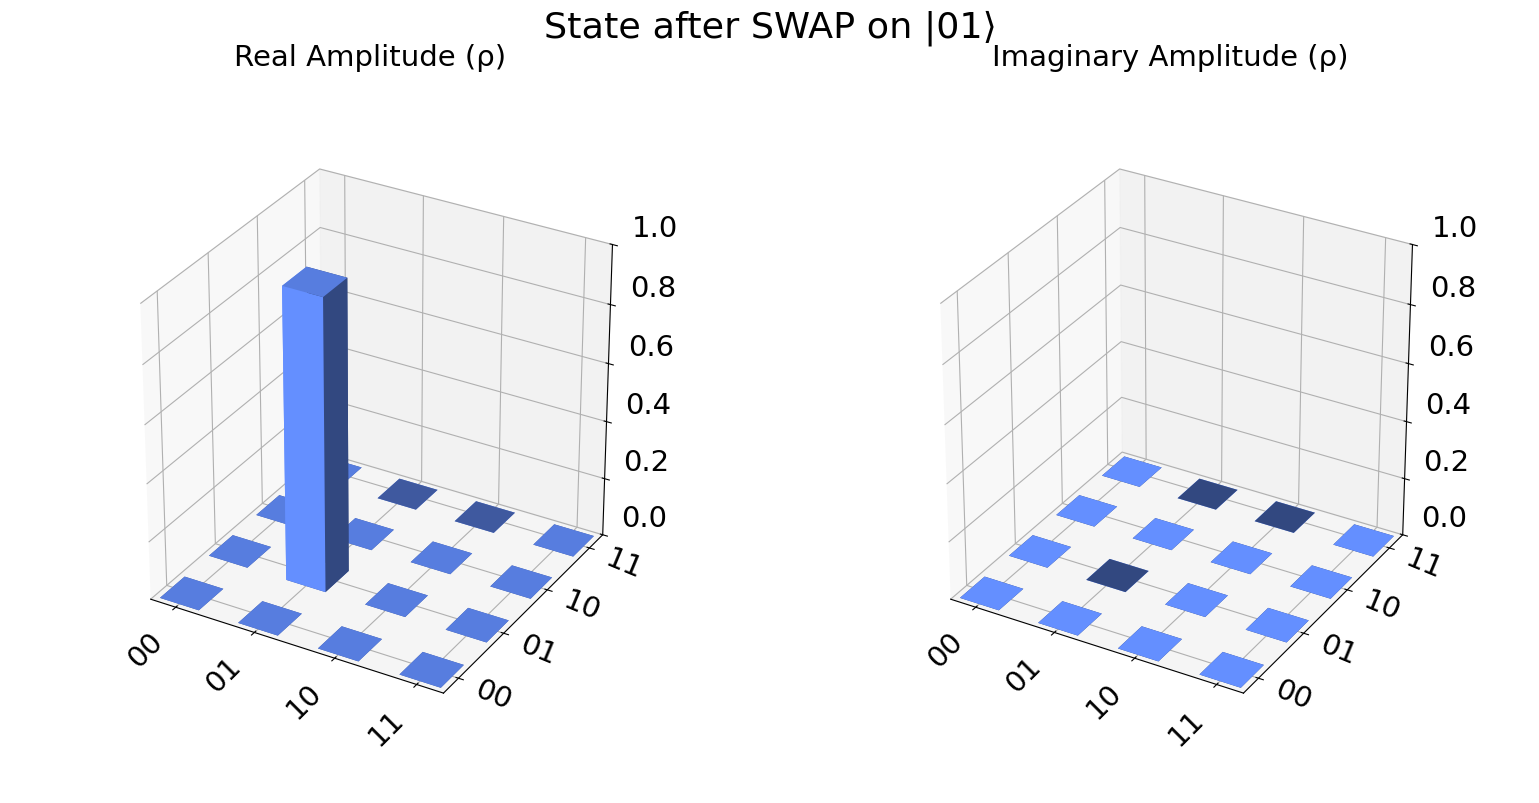

In [7]:
qc_swap = QuantumCircuit(2)
# Let's prepare state |01> (q0=0, q1=1)
qc_swap.x(1)
print("Initial state for SWAP test (|01>):")
sv_before_swap = Statevector(qc_swap)
print(np.round(sv_before_swap.data, 3)) # Expect [0,1,0,0]

qc_swap.swap(0,1) # Apply SWAP gate between q0 and q1
print("\nCircuit for SWAP on |01>:")
print(qc_swap.draw(output='text'))

sv_after_swap = Statevector(qc_swap)
print(f"\nStatevector after SWAP on |01>: {np.round(sv_after_swap.data, 3)}")
# Expect [0,0,1,0] which is |10>
plot_state_city(sv_after_swap, title="State after SWAP on |01⟩")

In [11]:
qc_swap_test = QuantumCircuit(2)
# Let's prepare state |01> (q1=0, q0=1)
qc_swap_test.x(0) # X on q0
print("Initial state for SWAP test (|01> for q1q0):")
sv_before_swap = Statevector(qc_swap_test)
print(np.round(sv_before_swap.data, 3)) # Expect [0,1,0,0] (amplitude for |01> is 1)

# Apply SWAP gate between q0 and q1
qc_swap_test.swap(0,1)
print("\nCircuit for SWAP(q0,q1) on |01> (input):")
print(qc_swap_test.draw(output='text'))

sv_after_swap = Statevector(qc_swap_test)
print(f"\nStatevector after SWAP on |01>: {np.round(sv_after_swap.data, 3)}")
# Expect [0,0,1,0] which is |10>
plot_state_city(sv_after_swap, title="State after SWAP(q0,q1) on input |01⟩")
plt.show()

Initial state for SWAP test (|01> for q1q0):
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]

Circuit for SWAP(q0,q1) on |01> (input):
     ┌───┐   
q_0: ┤ X ├─X─
     └───┘ │ 
q_1: ──────X─
             

Statevector after SWAP on |01>: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]


**Analysis:**
Starting with |01⟩ (statevector `[0,1,0,0]`), after SWAP(0,1), the state becomes |10⟩ (statevector `[0,0,1,0]`).
**Physical Significance of SWAP:** On real quantum hardware, qubits are fixed in physical locations. If you need to perform a CNOT between two qubits that are not directly connected ("neighbors"), you might need a sequence of SWAP gates to bring them "virtually" next to each other. This adds overhead to the circuit. Transpilers often handle this, but it increases gate count and potential errors.

**Analysis:**
We start with the state |01⟩ (q1=0, q0=1), which has the statevector `[0,1,0,0]`.
After applying `SWAP(0,1)`, the states of q0 and q1 are exchanged. The new state is |10⟩ (q1=1, q0=0), and its statevector is `[0,0,1,0]`.
**Physical Significance of SWAP:** On real quantum hardware, qubits are fixed at physical locations on a chip. Not all pairs of qubits might be able to directly interact to perform a CNOT (they might not be "connected"). If an algorithm requires an interaction between two distant qubits, the `transpile` process might insert SWAP gates to move the quantum information of one qubit to a location adjacent to the other, perform the CNOT, and then potentially SWAP back. These SWAP operations add to the circuit depth and can introduce more errors, as each SWAP is typically composed of three CNOTs, and CNOTs are often the noisiest two-qubit gates.

## 5. Universal Gate Sets (Brief Mention)

A set of quantum gates is **universal** if any unitary operation (any possible quantum computation) can be approximated to arbitrary accuracy by a sequence of gates from that set.
*   For single qubits: {H, T} is a common universal set (Pauli gates, S can be made from these).
*   For multiple qubits: {CNOT, H, T} is a common universal set. This means any quantum algorithm can be built using just these gates!

This is a powerful concept, ensuring we don't need an infinite variety of gates.

## 6. Measuring Multi-Qubit Systems

Measurement in multi-qubit systems extends naturally from the single-qubit case. If a 2-qubit system is in a general state:
$$ |ψ⟩ = c_{00}|00⟩ + c_{01}|01⟩ + c_{10}|10⟩ + c_{11}|11⟩ $$
When we perform a measurement on both qubits in the computational basis:
*   Probability of measuring '00' (q1=0, q0=0) = $|c_{00}|^2$
*   Probability of measuring '01' (q1=0, q0=1) = $|c_{01}|^2$
*   Probability of measuring '10' (q1=1, q0=0) = $|c_{10}|^2$
*   Probability of measuring '11' (q1=1, q0=1) = $|c_{11}|^2$
The sum of these probabilities must be 1. Measurement collapses the system to the specific basis state observed.

We saw this with the Bell state $|Φ^+⟩ = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)$.
$P(00) = |1/\sqrt{2}|^2 = 1/2$.
$P(11) = |1/\sqrt{2}|^2 = 1/2$.
$P(01) = P(10) = 0$.
The measurement outcomes are correlated.

**Partial Measurement:**
It's also possible to measure only a subset of the qubits in a multi-qubit system. This is a more advanced topic involving concepts like mixed states and density matrices if the remaining qubits are still quantum, but for beginners, the key idea is that measuring one part of an entangled system can instantly affect the probabilities for outcomes on the other part(s).

## 7. Exercises

1.  **Create other Bell States:**
    *   Modify the circuit from Cell 5 to create the $|Φ^-⟩ = \frac{|00⟩ - |11⟩}{\sqrt{2}}$ state.
        (Hint: You might need an X or Z gate before the H gate on q0).
    *   Verify its statevector and measurement outcomes.

2.  **CNOT and Basis Change:**
    *   Consider the CNOT(q0, q1) gate. If the control qubit q0 is in the state |+⟩ and the target q1 is in |0⟩, what is the state of the two-qubit system *after* the CNOT?
    *   Write down the initial state: $|+⟩_0 \otimes |0⟩_1 = \frac{1}{\sqrt{2}}(|0⟩_0 + |1⟩_0) \otimes |0⟩_1$.
    *   Apply the CNOT logic to each part of the superposition.
    *   Calculate the final statevector. Is it entangled?
    *   Verify your result using Qiskit and `Statevector`.

3.  **GHZ State:**
    *   A Greenberger–Horne–Zeilinger (GHZ) state is a 3-qubit entangled state:
        $|GHZ⟩ = \frac{|000⟩ + |111⟩}{\sqrt{2}}$
    *   Construct a circuit to create this state. (Hint: H on q0, then CNOT(q0,q1), then CNOT(q0,q2)).
    *   Verify its statevector and measurement outcomes (expect '000' or '111').

4.  **SWAP from CNOTs:**
    *   Verify experimentally (using Qiskit and `Statevector`) that the sequence `CNOT(a,b) CNOT(b,a) CNOT(a,b)` indeed performs a SWAP operation between qubits `a` and `b`. Test it on an input like |01⟩.

## Lecture 2 Summary

In this lecture, we ventured into the realm of multi-qubit systems:
*   Learned how to represent multi-qubit states using the **tensor product**, understanding the exponential growth of the state space.
*   Mastered the **CNOT (CX) gate**, a fundamental two-qubit entangling gate, understanding its conditional logic and matrix representation.
*   Explored the profound concept of **quantum entanglement** by creating, simulating, and measuring **Bell states** (specifically $|Φ^+⟩$). We saw how entangled qubits exhibit correlated measurement outcomes.
*   Introduced other useful two-qubit gates: **CZ (Controlled-Z)** for conditional phase flips and **SWAP** for exchanging qubit states.
*   Briefly touched upon the concept of **universal gate sets**, highlighting that a few basic gates are sufficient for all quantum computations.
*   Discussed practical considerations for running multi-qubit circuits on real quantum hardware, such as qubit **connectivity** and **noise**, and the role of **transpilation**.

With the ability to manipulate both single and multiple qubits, and to create entanglement, we now possess the core building blocks for designing and understanding basic quantum algorithms, which we'll explore in future lectures!